In [4]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [5]:
type(data)

dict

In [7]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10485,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.950455e+07,1.950455e+07,False,NaN,1,NaN,NaN,None,2023-10-05T12:03:00.000Z,27735.795168,1.016685e+10,-10.9034,0.005084,0.555912,4.833333,7.625519,-4.480310,-7.952247,5.409742e+11,49.7152,5.824517e+11,None,2023-10-05T12:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-05 13:05:30.490230
1,1027,Ethereum,ETH,ethereum,7484,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202431e+08,1.202431e+08,True,NaN,2,NaN,NaN,None,2023-10-05T12:03:00.000Z,1636.785452,4.582619e+09,-8.8980,-0.248403,-0.637295,0.877284,0.117182,-10.552360,-12.044708,1.968121e+11,18.0920,1.968121e+11,None,2023-10-05T12:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-05 13:05:30.490230
2,825,Tether USDt,USDT,tether,63171,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.336690e+10,8.642571e+10,True,NaN,3,NaN,NaN,None,2023-10-05T12:03:00.000Z,1.000041,1.723269e+10,-36.1527,-0.004140,0.009740,0.086156,0.079426,0.138411,0.003541,8.337035e+10,7.6650,8.642929e+10,None,2023-10-05T12:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-05 13:05:30.490230
3,1839,BNB,BNB,bnb,1659,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538461e+08,1.538461e+08,False,NaN,4,NaN,NaN,None,2023-10-05T12:03:00.000Z,212.489567,3.321437e+08,-0.8107,-0.176127,0.010783,-0.456406,-1.184833,-12.967219,-9.030582,3.269069e+10,3.0059,3.269069e+10,None,2023-10-05T12:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-05 13:05:30.490230
4,52,XRP,XRP,xrp,1108,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.331236e+10,9.998840e+10,False,NaN,5,NaN,NaN,None,2023-10-05T12:03:00.000Z,0.522982,9.337637e+08,-46.8312,-0.258860,-1.911500,4.337259,3.860806,-17.297722,12.135872,2.788139e+10,2.5630,5.229817e+10,None,2023-10-05T12:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-05 13:05:30.490230
5,3408,USDC,USDC,usd-coin,14318,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.525206e+10,2.525206e+10,False,NaN,6,NaN,NaN,None,2023-10-05T12:03:00.000Z,0.999951,2.344651e+09,-8.8345,-0.014431,-0.002316,-0.007440,0.000611,-0.002945,0.002418,2.525082e+10,2.3218,2.525082e+10,None,2023-10-05T12:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-05 13:05:30.490230
6,5426,Solana,SOL,solana,534,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.135697e+08,5.591598e+08,True,NaN,7,NaN,NaN,None,2023-10-05T12:03:00.000Z,23.230757,3.621739e+08,-39.1906,-0.216584,-1.468960,21.271121,18.865146,0.173202,14.971868,9.607537e+09,0.8832,1.298970e+10,None,2023-10-05T12:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-05 13:05:30.490230
7,2010,Cardano,ADA,cardano,942,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.514040e+10,3.622901e+10,False,NaN,8,NaN,NaN,None,2023-10-05T12:03:00.000Z,0.261436,9.690245e+07,-40.8654,0.485356,1.898543,6.069037,1.741844,-11.268298,-7.390703,9.186960e+09,0.8446,1.176461e+10,None,2023-10-05T12:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-05 13:05:30.490230
8,74,Dogecoin,DOGE,dogecoin,803,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.

In [13]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
        
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=True)
    
    if not os.path.isfile(r'C:\Users\arthu\API.csv'):
        df.to_csv((r'C:\Users\arthu\API.csv'), header = 'column_names')
    else:
        df.to_csv((r'C:\Users\arthu\API.csv'), mode = 'a', header = False)        

In [14]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60)
exit()

API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [15]:
df72 = pd.read_csv(r'C:\Users\arthu\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10485,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.950455e+07,1.950455e+07,False,NaN,1,NaN,NaN,NaN,2023-10-05T12:03:00.000Z,27735.795168,1.016685e+10,-10.9034,0.005084,0.555912,4.833333,7.625519,-4.480310,-7.952247,5.409742e+11,49.7152,5.824517e+11,NaN,2023-10-05T12:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-05 13:05:30.490230
1,1,1027,Ethereum,ETH,ethereum,7484,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202431e+08,1.202431e+08,True,NaN,2,NaN,NaN,NaN,2023-10-05T12:03:00.000Z,1636.785452,4.582619e+09,-8.8980,-0.248403,-0.637295,0.877284,0.117182,-10.552360,-12.044708,1.968121e+11,18.0920,1.968121e+11,NaN,2023-10-05T12:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-05 13:05:30.490230
2,2,825,Tether USDt,USDT,tether,63171,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.336690e+10,8.642571e+10,True,NaN,3,NaN,NaN,NaN,2023-10-05T12:03:00.000Z,1.000041,1.723269e+10,-36.1527,-0.004140,0.009740,0.086156,0.079426,0.138411,0.003541,8.337035e+10,7.6650,8.642929e+10,NaN,2023-10-05T12:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-05 13:05:30.490230
3,3,1839,BNB,BNB,bnb,1659,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.538461e+08,1.538461e+08,False,NaN,4,NaN,NaN,NaN,2023-10-05T12:03:00.000Z,212.489567,3.321437e+08,-0.8107,-0.176127,0.010783,-0.456406,-1.184833,-12.967219,-9.030582,3.269069e+10,3.0059,3.269069e+10,NaN,2023-10-05T12:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-05 13:05:30.490230
4,4,52,XRP,XRP,xrp,1108,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.331236e+10,9.998840e+10,False,NaN,5,NaN,NaN,NaN,2023-10-05T12:03:00.000Z,0.522982,9.337637e+08,-46.8312,-0.258860,-1.911500,4.337259,3.860806,-17.297722,12.135872,2.788139e+10,2.5630,5.229817e+10,NaN,2023-10-05T12:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-05 13:05:30.490230
5,5,3408,USDC,USDC,usd-coin,14318,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.525206e+10,2.525206e+10,False,NaN,6,NaN,NaN,NaN,2023-10-05T12:03:00.000Z,0.999951,2.344651e+09,-8.8345,-0.014431,-0.002316,-0.007440,0.000611,-0.002945,0.002418,2.525082e+10,2.3218,2.525082e+10,NaN,2023-10-05T12:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-05 13:05:30.490230
6,6,5426,Solana,SOL,solana,534,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.135697e+08,5.591598e+08,True,NaN,7,NaN,NaN,NaN,2023-10-05T12:03:00.000Z,23.230757,3.621739e+08,-39.1906,-0.216584,-1.468960,21.271121,18.865146,0.173202,14.971868,9.607537e+09,0.8832,1.298970e+10,NaN,2023-10-05T12:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-05 13:05:30.490230
7,7,2010,Cardano,ADA,cardano,942,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.514040e+10,3.622901e+10,False,NaN,8,NaN,NaN,NaN,2023-10-05T12:03:00.000Z,0.261436,9.690245e+07,-40.8654,0.485356,1.898543,6.069037,1.741844,-11.268298,-7.390703,9.186960e+09,0.8446,1.176461e+10,NaN,2023-10-05T12:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-05 13:05:30.490230
8,8,74,Dogecoin,DOGE,dogecoin,803,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-exc

In [16]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10485,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19504550.00000,19504550.00000,False,NaN,1,NaN,NaN,NaN,2023-10-05T12:03:00.000Z,27735.79517,10166845694.04779,-10.90340,0.00508,0.55591,4.83333,7.62552,-4.48031,-7.95225,540974203642.36169,49.71520,582451698526.21997,NaN,2023-10-05T12:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-05 13:05:30.490230
1,1,1027,Ethereum,ETH,ethereum,7484,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120243063.86203,120243063.86203,True,NaN,2,NaN,NaN,NaN,2023-10-05T12:03:00.000Z,1636.78545,4582619494.16691,-8.89800,-0.24840,-0.63729,0.87728,0.11718,-10.55236,-12.04471,196812097677.52277,18.09200,196812097677.51999,NaN,2023-10-05T12:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-05 13:05:30.490230
2,2,825,Tether USDt,USDT,tether,63171,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83366897433.59711,86425711834.21460,True,NaN,3,NaN,NaN,NaN,2023-10-05T12:03:00.000Z,1.00004,17232688583.94941,-36.15270,-0.00414,0.00974,0.08616,0.07943,0.13841,0.00354,83370352318.29483,7.66500,86429293482.07001,NaN,2023-10-05T12:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-05 13:05:30.490230
3,3,1839,BNB,BNB,bnb,1659,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,153846111.44980,153846111.44980,False,NaN,4,NaN,NaN,NaN,2023-10-05T12:03:00.000Z,212.48957,332143678.45942,-0.81070,-0.17613,0.01078,-0.45641,-1.18483,-12.96722,-9.03058,32690693622.35048,3.00590,32690693622.35000,NaN,2023-10-05T12:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-05 13:05:30.490230
4,4,52,XRP,XRP,xrp,1108,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,53312364216.00000,99988397127.00000,False,NaN,5,NaN,NaN,NaN,2023-10-05T12:03:00.000Z,0.52298,933763699.00899,-46.83120,-0.25886,-1.91150,4.33726,3.86081,-17.29772,12.13587,27881391137.18094,2.56300,52298170503.59000,NaN,2023-10-05T12:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-05 13:05:30.490230
5,5,3408,USDC,USDC,usd-coin,14318,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,25252056449.66856,25252056449.66856,False,NaN,6,NaN,NaN,NaN,2023-10-05T12:03:00.000Z,0.99995,2344651120.87387,-8.83450,-0.01443,-0.00232,-0.00744,0.00061,-0.00295,0.00242,25250819242.16202,2.32180,25250819242.16000,NaN,2023-10-05T12:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-05 13:05:30.490230
6,6,5426,Solana,SOL,solana,534,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,413569700.11072,559159775.89782,True,NaN,7,NaN,NaN,NaN,2023-10-05T12:03:00.000Z,23.23076,362173890.78041,-39.19060,-0.21658,-1.46896,21.27112,18.86515,0.17320,14.97187,9607537106.77828,0.88320,12989704744.13000,NaN,2023-10-05T12:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-05 13:05:30.490230
7,7,2010,Cardano,ADA,cardano,942,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35140403093.06600,36229014789.87600,False,NaN,8,NaN,NaN,NaN,2023-10-05T12:03:00.000Z,0.26144,96902445.94392,-40.86540,0.48536,1.89854,6.06904,1.74184,-11.26830,-7.39070,9186960179.88149,0.84460,11764612005.15000,NaN,2023-10-05T12:03:00.00

In [20]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()

In [22]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.06765
             quote.USD.percent_change_24h     0.61478
             quote.USD.percent_change_7d      4.88082
             quote.USD.percent_change_30d     7.76628
             quote.USD.percent_change_60d    -4.43418
             quote.USD.percent_change_90d    -7.98538
Ethereum     quote.USD.percent_change_1h     -0.17860
             quote.USD.percent_change_24h    -0.58931
             quote.USD.percent_change_7d      0.89267
             quote.USD.percent_change_30d     0.21976
             quote.USD.percent_change_60d   -10.52676
             quote.USD.percent_change_90d   -12.08338
Tether USDt  quote.USD.percent_change_1h     -0.00664
             quote.USD.percent_change_24h     0.00588
             quote.USD.percent_change_7d      0.09158
             quote.USD.percent_change_30d     0.08082
             quote.USD.percent_change_60d     0.13947
             quote.USD.percent_change_90

In [27]:
df5 = df4.to_frame(name = 'values')
df5.count

values    90
dtype: int64

In [36]:
index = pd.Index(range(int(df5.count().iloc[0])))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.06765
1,Bitcoin,quote.USD.percent_change_24h,0.61478
2,Bitcoin,quote.USD.percent_change_7d,4.88082
3,Bitcoin,quote.USD.percent_change_30d,7.76628
4,Bitcoin,quote.USD.percent_change_60d,-4.43418
5,Bitcoin,quote.USD.percent_change_90d,-7.98538
6,Ethereum,quote.USD.percent_change_1h,-0.17860
7,Ethereum,quote.USD.percent_change_24h,-0.58931
8,Ethereum,quote.USD.percent_change_7d,0.89267
9,Ethereum,quote.USD.percent_change_30d,0.21976


In [43]:
df7 = df6.rename(columns = {'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.06765
1,Bitcoin,quote.USD.percent_change_24h,0.61478
2,Bitcoin,quote.USD.percent_change_7d,4.88082
3,Bitcoin,quote.USD.percent_change_30d,7.76628
4,Bitcoin,quote.USD.percent_change_60d,-4.43418
5,Bitcoin,quote.USD.percent_change_90d,-7.98538
6,Ethereum,quote.USD.percent_change_1h,-0.17860
7,Ethereum,quote.USD.percent_change_24h,-0.58931
8,Ethereum,quote.USD.percent_change_7d,0.89267
9,Ethereum,quote.USD.percent_change_30d,0.21976


In [45]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.06765
1,Bitcoin,24h,0.61478
2,Bitcoin,7d,4.88082
3,Bitcoin,30d,7.76628
4,Bitcoin,60d,-4.43418
5,Bitcoin,90d,-7.98538
6,Ethereum,1h,-0.17860
7,Ethereum,24h,-0.58931
8,Ethereum,7d,0.89267
9,Ethereum,30d,0.21976


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\arthu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


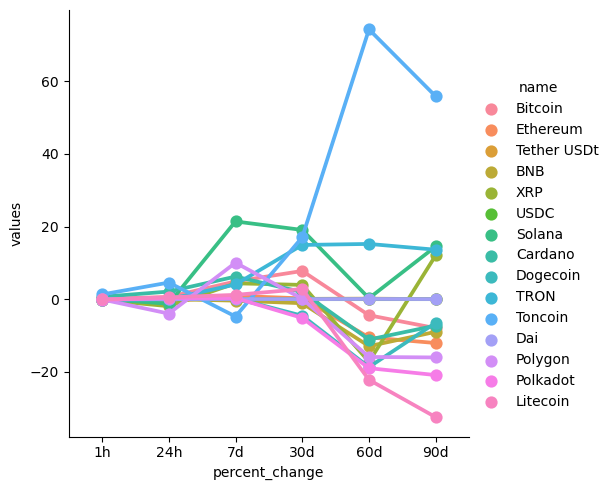

In [46]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [52]:
df10 = df[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,27735.79517,2023-10-05 13:05:30.490230
15,Bitcoin,27748.13858,2023-10-05 13:07:39.491081
30,Bitcoin,27756.26248,2023-10-05 13:08:40.134176
45,Bitcoin,27756.26248,2023-10-05 13:09:40.811139


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

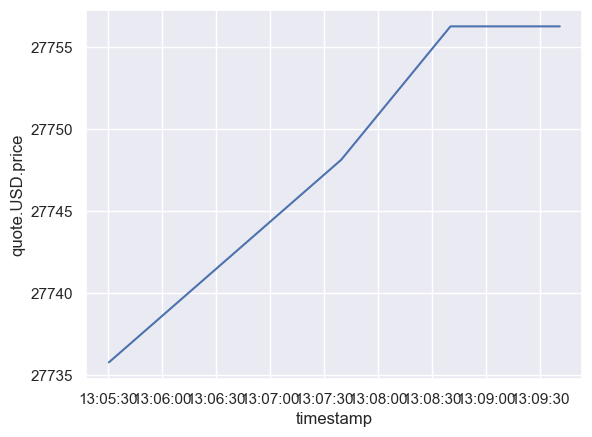

In [58]:
sns.set_theme(style = 'darkgrid')

sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df10)